# cf-python Regridding

* **Based on the ESMPy interface to the Earth System Modeling Framework (ESMF) library**
* **Coordinate systems: Spherical (regrids) or Cartesian (regridc)**
* **Regridding methods:**
    * **First order conservative** - conserves integral of field with respect to area
    * **Bilinear** - linear interpolation in 1-3 dimensions (2D for sperical coordinates)
    * **Higher order patch recovery** - polynomial based so better values/derivatives
    * **Nearest source to destination** - useful for integer fields such as land use
    * **Nearest destination to source** - multiple source points can contribute to one destination point
* **Global or regional source/destination grids in any combination**
* **Handles grids with 2D latitudes and longitudes including curvilinear, rotated pole and some tripolar grids**
* **Handles masking of both source and destination grids**

## Spherical regridding (regrids)

In [3]:
# Plot images inline - not needed in Python
%matplotlib inline

In [4]:
# Import the cf and cfplot packages
import cf
import cfplot as cfp

In [11]:
# Read in ncas_data/precip_2001-2010_low_res.nc and inspect the field
f = cf.read('~/blueberry_11_19/cf_training/jupyter/ncas_data/precip_2010.nc')[0]
print(f)

Field: long_name=precipitation (ncvar%pre)
------------------------------------------
Data            : long_name=precipitation(long_name=time(12), latitude(145), longitude(53)) mm
Dimension coords: long_name=time(12) = [2010-01-16 00:00:00, ..., 2010-12-16 00:00:00] gregorian
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(53) = [-33.75, ..., 63.75] degrees_east



In [14]:
# Read in ncas_data/model_precip_DJF_means_low_res.nc and inspect the field
g = cf.read('~/blueberry_11_19/cf_training/jupyter/ncas_data/model_precip_DJF_means_low_res.nc')[0]
print(g)

Field: long_name=precipitation (ncvar%precip)
---------------------------------------------
Data            : long_name=precipitation(long_name=t(1), long_name=Surface(1), latitude(73), longitude(27)) mm/day
Cell methods    : long_name=t(1): mean
Dimension coords: long_name=t(1) = [1996-07-16 00:00:00] 360_day
                : long_name=Surface(1) = [0.0] level
                : latitude(73) = [-90.0, ..., 90.0] degrees_north
                : longitude(27) = [-33.75, ..., 63.75] degrees_east



In [16]:
# Regrid the first field to the grid of the second and inspect the results
h = f.regrids(g, method='conservative')
print(h)

Field: long_name=precipitation (ncvar%pre)
------------------------------------------
Data            : long_name=precipitation(long_name=time(12), latitude(73), longitude(27)) mm
Dimension coords: long_name=time(12) = [2010-01-16 00:00:00, ..., 2010-12-16 00:00:00] gregorian
                : latitude(73) = [-90.0, ..., 90.0] degrees_north
                : longitude(27) = [-33.75, ..., 63.75] degrees_east



/home/znjs2/.conda/envs/basemap/lib/python3.7/site-packages/cfplot/cfplot.py:3021: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plotvars.rows, plotvars.columns, pos)
/home/znjs2/.conda/envs/basemap/lib/python3.7/site-packages/numpy/ma/core.py:3172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/znjs2/.conda/envs/basemap/lib/python3.7/site-packages/numpy/ma/core.py:3204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

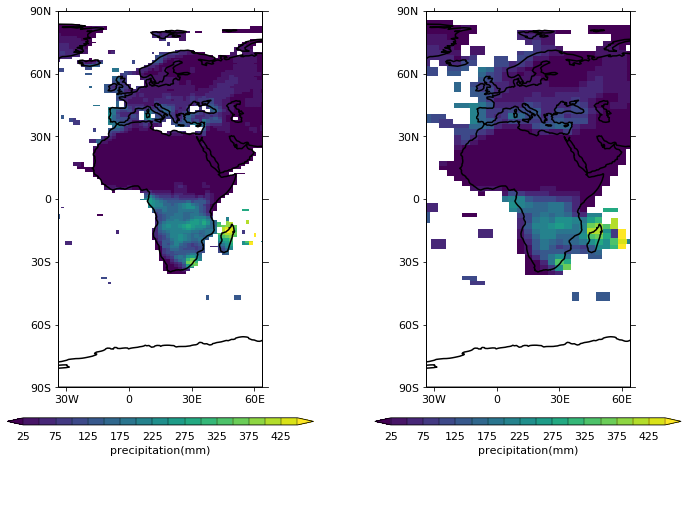

In [17]:
# Plot before and after
cfp.gopen(rows=1, columns=2)
cfp.gpos(1)
cfp.con(f[0], blockfill=True, lines=False, colorbar_label_skip=2)
cfp.gpos(2)
cfp.con(h[0], blockfill=True, lines=False, colorbar_label_skip=2)
cfp.gclose()

# Regridding from a tripolar grid

![alt text](https://www.gfdl.noaa.gov/wp-content/uploads/pix/user_images/mw/bipolar.gif "Tripolar Grid")

In [19]:
# Read in ncas_data/tripolar.nc and select and inspect a field
f = cf.read('~/blueberry_11_19/cf_training/jupyter/ncas_data/tripolar.nc')[0]
print(f)

Field: sea_surface_height_above_geoid (ncvar%sossheig)
------------------------------------------------------
Data            : sea_surface_height_above_geoid(time(1), ncdim%y(332), ncdim%x(362)) m
Cell methods    : time(1): mean (interval: 2700 s)
Dimension coords: time(1) = [1978-09-06 00:00:00] 360_day
Auxiliary coords: time(time(1)) = [1978-09-06 00:00:00] 360_day
                : longitude(ncdim%y(332), ncdim%x(362)) = [[72.5, ..., 72.98915100097656]] degrees_east
                : latitude(ncdim%y(332), ncdim%x(362)) = [[-84.21070861816406, ..., 50.01094055175781]] degrees_north



In [22]:
# Read in ncas_data/model_precip_DJF_means.nc and inspect the field
g = cf.read('~/blueberry_11_19/cf_training/jupyter/ncas_data/model_precip_DJF_means.nc')[0]
print(g)

Field: long_name=precipitation (ncvar%precip)
---------------------------------------------
Data            : long_name=precipitation(long_name=t(1), long_name=Surface(1), latitude(145), longitude(192)) mm/day
Cell methods    : long_name=t(1): mean
Dimension coords: long_name=t(1) = [1996-07-16 00:00:00] 360_day
                : long_name=Surface(1) = [0.0] level
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east



In [23]:
# Regrid the field on the tripolar grid to the regular lat-long grid
h = f.regrids(g, method='bilinear', src_axes={'X': 'ncdim%x', 'Y': 'ncdim%y'}, src_cyclic=True)
print(h)

Field: sea_surface_height_above_geoid (ncvar%sossheig)
------------------------------------------------------
Data            : sea_surface_height_above_geoid(time(1), latitude(145), longitude(192)) m
Cell methods    : time(1): mean (interval: 2700 s)
Dimension coords: time(1) = [1978-09-06 00:00:00] 360_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
Auxiliary coords: time(time(1)) = [1978-09-06 00:00:00] 360_day



/home/znjs2/.conda/envs/basemap/lib/python3.7/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


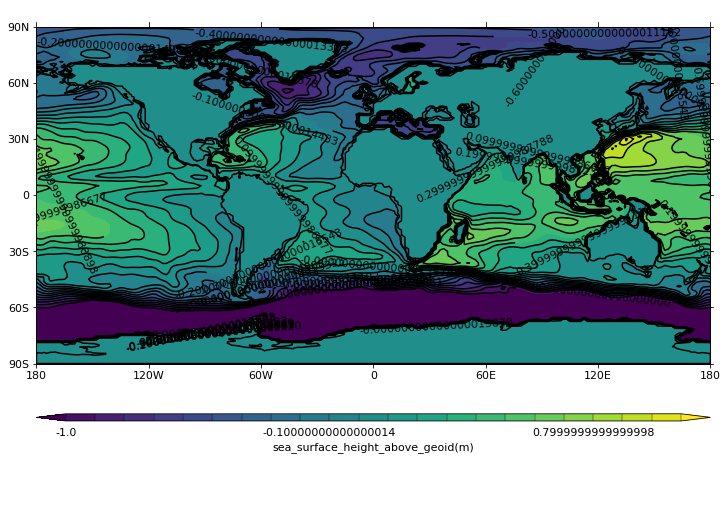

In [24]:
# Plot the regridded data
cfp.con(h)

# Higher order patch recovery versus bilinear regridding

In [26]:
# Read in ncas_data/data5.nc and inspect the field
f = cf.read('~/blueberry_11_19/cf_training/jupyter/ncas_data/data5.nc')[0].subspace[0, 0]
print(f)

Field: eastward_wind (ncvar%U)
------------------------------
Data            : eastward_wind(time(1), pressure(1), latitude(160), longitude(320)) m s**-1
Dimension coords: time(1) = [1987-03-15 00:00:00]
                : pressure(1) = [1000.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east



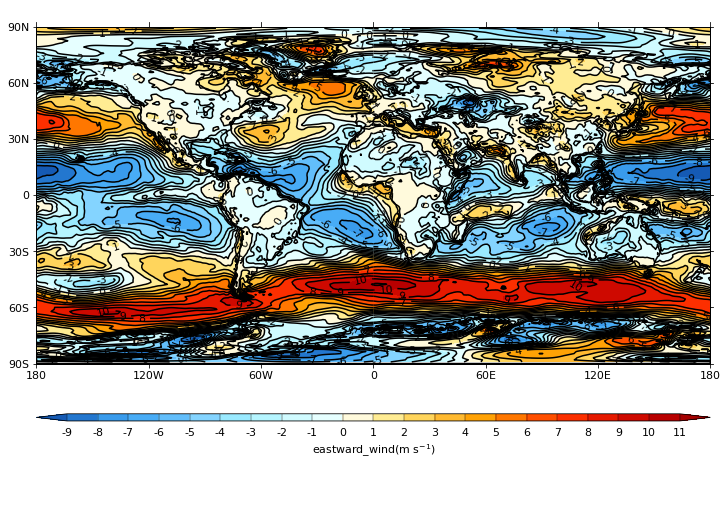

In [27]:
cfp.con(f)

In [28]:
# Read in ncas_data/model_precip_DJF_means_low_res.nc and inspect the field
g = cf.read('~/blueberry_11_19/cf_training/jupyter/ncas_data/model_precip_DJF_means_low_res.nc')[0]
print(g)

Field: long_name=precipitation (ncvar%precip)
---------------------------------------------
Data            : long_name=precipitation(long_name=t(1), long_name=Surface(1), latitude(73), longitude(27)) mm/day
Cell methods    : long_name=t(1): mean
Dimension coords: long_name=t(1) = [1996-07-16 00:00:00] 360_day
                : long_name=Surface(1) = [0.0] level
                : latitude(73) = [-90.0, ..., 90.0] degrees_north
                : longitude(27) = [-33.75, ..., 63.75] degrees_east



In [29]:
# Regrid the first field to the grid of the second using bilinear interpolation
h = f.regrids(g, method='bilinear')
print(h)

Field: eastward_wind (ncvar%U)
------------------------------
Data            : eastward_wind(time(1), pressure(1), latitude(73), longitude(27)) m s**-1
Dimension coords: time(1) = [1987-03-15 00:00:00]
                : pressure(1) = [1000.0] mbar
                : latitude(73) = [-90.0, ..., 90.0] degrees_north
                : longitude(27) = [-33.75, ..., 63.75] degrees_east



In [30]:
# Regrid the first field to the grid of the second using higher order patch recovery
i = f.regrids(g, method='patch')
print(i)

Field: eastward_wind (ncvar%U)
------------------------------
Data            : eastward_wind(time(1), pressure(1), latitude(73), longitude(27)) m s**-1
Dimension coords: time(1) = [1987-03-15 00:00:00]
                : pressure(1) = [1000.0] mbar
                : latitude(73) = [-90.0, ..., 90.0] degrees_north
                : longitude(27) = [-33.75, ..., 63.75] degrees_east



In [31]:
# Find the y derivatives of the regridded fields
deriv_h = h.derivative('Y')
deriv_h.units = 'm.s-1.degrees-1'
deriv_i = i.derivative('Y')
deriv_i.units = 'm.s-1.degrees-1'

TypeError: 'numpy.float64' object is not iterable

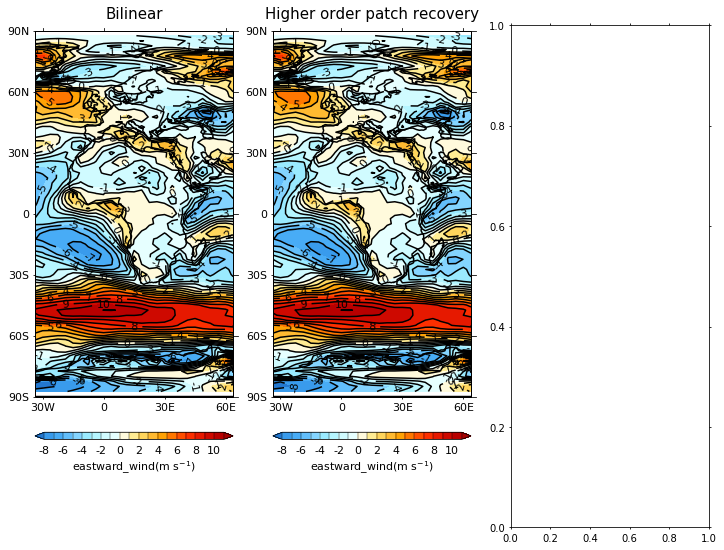

In [32]:
# Plot the regridded fields and the differences between the derivatives
cfp.gopen(rows=1, columns=3)
cfp.gpos(1)
cfp.con(h, colorbar_label_skip=2, title='Bilinear')
cfp.gpos(2)
cfp.con(i, colorbar_label_skip=2, title='Higher order patch recovery')
cfp.gpos(3)
cfp.con(deriv_i - deriv_h, blockfill=True, lines=False, colorbar_label_skip=2, title='Difference of derivatives')
cfp.gclose()

# Regridding an integer field using the nearest neighbour method

In [36]:
# Read in ncas_data/regions_low_res.nc and inspect the field
f = cf.read('~/blueberry_11_19/cf_training/jupyter/ncas_data/regions.nc')[0]
print(f)

Field: region (ncvar%Regionmask)
--------------------------------
Data            : region(latitude(145), longitude(53))
Dimension coords: latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(53) = [-33.75, ..., 63.75] degrees_east



In [34]:
# Read in ncas_data/model_precip_DJF_means_low_res.nc and inspect the field
g = cf.read('~/blueberry_11_19/cf_training/jupyter/ncas_data/model_precip_DJF_means_low_res.nc')[0]
print(g)

Field: long_name=precipitation (ncvar%precip)
---------------------------------------------
Data            : long_name=precipitation(long_name=t(1), long_name=Surface(1), latitude(73), longitude(27)) mm/day
Cell methods    : long_name=t(1): mean
Dimension coords: long_name=t(1) = [1996-07-16 00:00:00] 360_day
                : long_name=Surface(1) = [0.0] level
                : latitude(73) = [-90.0, ..., 90.0] degrees_north
                : longitude(27) = [-33.75, ..., 63.75] degrees_east



In [37]:
# Regrid regions to model grid using nearest source to destination regridding and inspect the result
h = f.regrids(g, method='nearest_stod')
print(h)

Field: region (ncvar%Regionmask)
--------------------------------
Data            : region(latitude(73), longitude(27))
Dimension coords: latitude(73) = [-90.0, ..., 90.0] degrees_north
                : longitude(27) = [-33.75, ..., 63.75] degrees_east



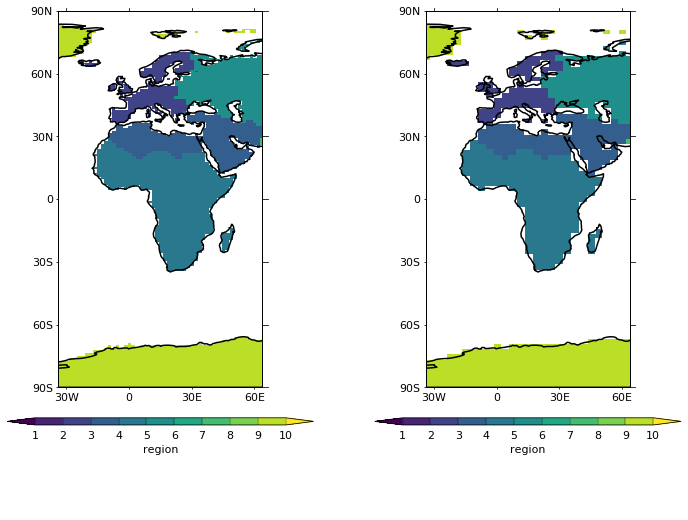

In [38]:
# Plot before and after
cfp.gopen(rows=1, columns=2)
cfp.levs(min=1, max=10, step=1)
cfp.gpos(1)
cfp.con(f, blockfill=True, lines=False)
cfp.gpos(2)
cfp.con(h, blockfill=True, lines=False)
cfp.gclose()

## Cartesian regridding (regridc)

In [41]:
# Read in ncas_data/precip_1D_yearly.nc and inspect the field
f = cf.read('~/blueberry_11_19/cf_training/jupyter/ncas_data/precip_1D_yearly.nc')[0]
print(f)

Field: long_name=precipitation (ncvar%pre)
------------------------------------------
Data            : long_name=precipitation(long_name=time(10), long_name=latitude(1), long_name=longitude(1)) mm
Cell methods    : long_name=time(10): mean long_name=latitude(1): long_name=longitude(1): mean
Dimension coords: long_name=time(10) = [1981-07-02 00:00:00, ..., 1990-07-02 00:00:00] gregorian
                : long_name=latitude(1) = [0.0] degrees_north
                : long_name=longitude(1) = [0.0] degrees_east



In [42]:
# Read in ncas_data/precip_1D_monthly.nc and inspect the field
g = cf.read('~/blueberry_11_19/cf_training/jupyter/ncas_data/precip_1D_monthly.nc')[0]
print(g)

Field: long_name=precipitation (ncvar%pre)
------------------------------------------
Data            : long_name=precipitation(long_name=time(120), long_name=latitude(1), long_name=longitude(1)) mm
Cell methods    : long_name=latitude(1): long_name=longitude(1): mean
Dimension coords: long_name=time(120) = [1981-01-16 00:00:00, ..., 1990-12-16 00:00:00] gregorian
                : long_name=latitude(1) = [0.0] degrees_north
                : long_name=longitude(1) = [0.0] degrees_east



In [43]:
# Regrid the first field to the grid of the second linearly and summarize the resulting field
h = f.regridc(g, axes='T', method='bilinear')
print(h)

Field: long_name=precipitation (ncvar%pre)
------------------------------------------
Data            : long_name=precipitation(long_name=time(120), long_name=latitude(1), long_name=longitude(1)) mm
Cell methods    : long_name=time(120): mean long_name=latitude(1): long_name=longitude(1): mean
Dimension coords: long_name=time(120) = [1981-01-16 00:00:00, ..., 1990-12-16 00:00:00] gregorian
                : long_name=latitude(1) = [0.0] degrees_north
                : long_name=longitude(1) = [0.0] degrees_east



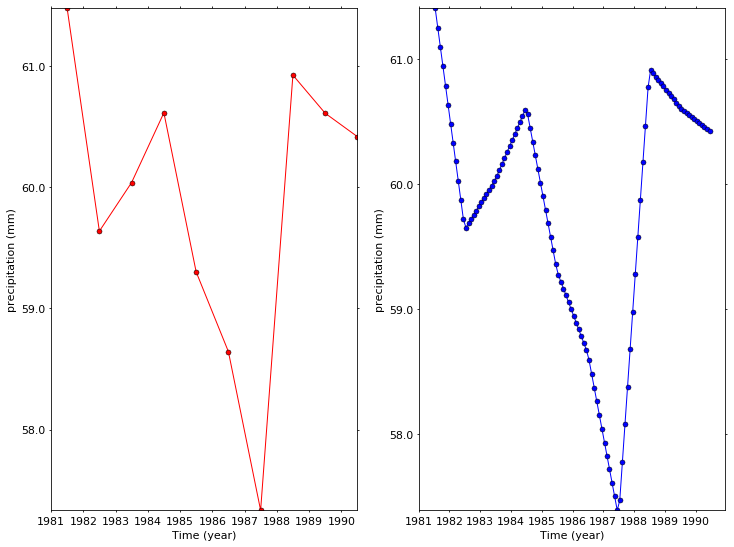

In [44]:
# Plot before and after
cfp.gopen(rows=1, columns=2)
cfp.gpos(1)
cfp.lineplot(f, marker='o', color='red')
cfp.gpos(2)
cfp.lineplot(h, marker='o', color='blue')
cfp.gclose()